In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **Data Analysis**

In [2]:
training_data = pd.read_csv("/kaggle/input/titanic/train.csv")
testing_data = pd.read_csv("/kaggle/input/titanic/test.csv")
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#displaying the names of the columns in the training data
training_data.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# displaying how many rows and columns are in the training data
print(training_data.shape)

(891, 12)


In [5]:
#displaying some general data about the columns in the training data
training_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#displaying some general information about the training data
# for example now we know that the youngest passenger was 0.42 years old and the oldest was 80 years old
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#checking the data types in the training data
training_data.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [8]:
#check how many null values are in the training data 
training_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
import seaborn as sns

In [10]:
training_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# **Data Visualisation**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

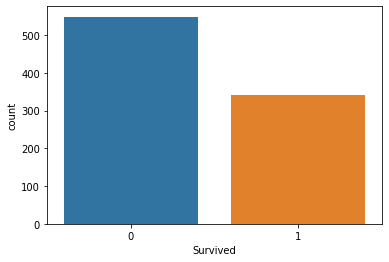

In [11]:
sns.countplot(training_data['Survived'])

In [12]:
#checking the percentage of women who survived

females = training_data.loc[training_data.Sex == 'female']['Survived']
percentage = sum(females)/len(females)
print(percentage)

0.7420382165605095


In [13]:
#checking the percentage of men who survived

males = training_data.loc[training_data.Sex == 'male']['Survived']
percentage = sum(males)/len(males)
print(percentage)

0.18890814558058924


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

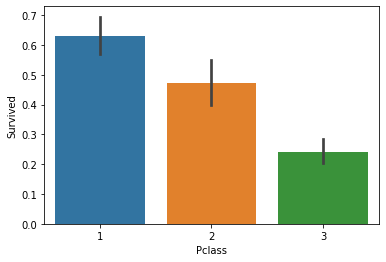

In [14]:
#checking the influence of the ticket class on the chances of surviving
sns.barplot(x='Pclass',y='Survived',data=training_data)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


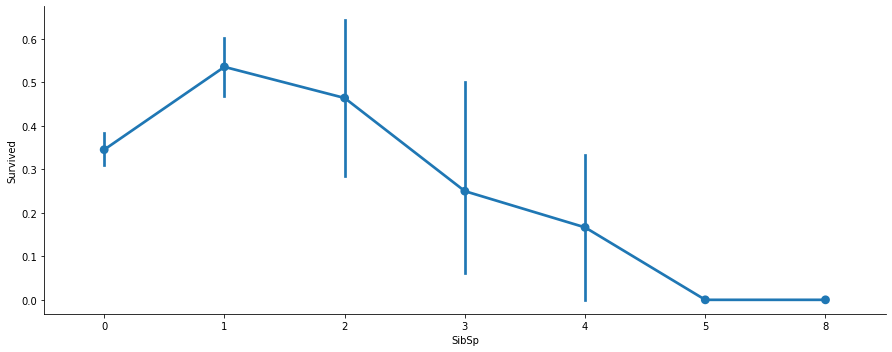

In [15]:
#now checking how the number of relatives had an impact on chances of surviving
axes = sns.factorplot('SibSp','Survived', data = training_data, aspect = 2.5)

# **Preprocessing**

In [16]:
#It was noticed that the "Embarked" column only had 2 missing values, that can easily be fixed by replacing
#with the most common values in that same column
training_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [17]:
common = 'S'
data = [training_data, testing_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common)

In [18]:

training_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [19]:
#replacing strings by numerical values

training_data.replace({'Sex':{'male':0,'female':1}}, inplace = True)
testing_data.replace({'Sex':{'male':0,'female':1}}, inplace = True)

training_data.replace({'Embarked':{'S':0,'C':1,'Q':2}}, inplace = True)
testing_data.replace({'Embarked':{'S':0,'C':1,'Q':2}}, inplace = True)

In [20]:
#checking for null values

training_data = training_data.drop(["PassengerId","Age","Cabin","Name"],axis=1,errors="ignore")
training_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [21]:
#defining the training and testing datasets


X_train = training_data.drop(["PassengerId","Age","Cabin","Name","Ticket","Survived",'Fare'],axis=1,errors="ignore")
Y_train = training_data["Survived"]
X_test = testing_data.drop(["PassengerId","Age","Cabin","Name","Ticket",'Fare'],axis=1,errors="ignore").copy()

In [22]:
X_test.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

# **Building the models**

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [24]:
#implementing decision tree and calculating the accuracy

decisiont = DecisionTreeClassifier()
decisiont.fit(X_train, Y_train)
Y_prediction = decisiont.predict(X_test)
accuracy = round(decisiont.score(X_train, Y_train)*100,2)
print(accuracy)

83.73


In [25]:
#implementing random forest and calculating accuracy

randomf = RandomForestClassifier(n_estimators = 100)
randomf.fit(X_train, Y_train)

Y_prediction = randomf.predict(X_test)

randomf.score(X_train, Y_train)
randomf_acc = round(randomf.score(X_train, Y_train)*100,2)
print("accuracy: ",randomf_acc)

output = pd.DataFrame({'PassengerId':testing_data.PassengerId,'Survived':Y_prediction})
output.to_csv('submission_1738483.csv', index=False)
print("submission saved")

accuracy:  83.73
submission saved


In [26]:
#implementing logistic regression and calculating accuracy


logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)

Y_prediction = logistic_regression.predict(X_test)
logistic_accuracy = round(logistic_regression.score(X_train, Y_train)*100,2)
print('Accuracy: ',logistic_accuracy)

Accuracy:  80.25
